<a href="https://colab.research.google.com/github/robcovino/MSDAP_notebooks/blob/main/Diffusion_maps_SMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np                                   # Package for numerical calculations 
import matplotlib as mpl                                # Package for plots
import matplotlib.pyplot as plt                      # 2D plots
import plotly.express as px                          # Interactive plots
from scipy.spatial import distance_matrix
from os import fspath
import pandas as pd                                  # Package for dataset handling
from sklearn.datasets import make_swiss_roll         # Toy Dataset for this exercise 
from sklearn.cluster import DBSCAN as DBSCAN         # Clustering method (data density)
from scipy.spatial.distance import squareform
from scipy.sparse.linalg import eigs
%matplotlib inline

In [2]:
## Diffusion Maps function definition

def DMAPS( data, eps ):
    
    '''Gaussian Kernel Mapping'''

    #dist = pdist( data , 'euclidean' ) 
    #assert np.all( dist - dist.T < 1e-6 )
    #dist = squareform( dist )
    dist_sq = np.square( data )
    W = np.exp( - dist_sq / eps ** 2 )

    ''' Normalization '''
        
    # normalization array, ith element is the sum of the ith row of matrix K
    NRM = W.sum( axis=1 ) 
    NRM = np.diag( NRM )
    NRM = np.linalg.inv( NRM )
    
    # D is the correctly normalized diffusion matrix
    D = np.dot( NRM, W )
    
    ''' Diagonalization of the matrix in the diffusion space'''
    
    # returns k largest eigenvaules/vectors
    evals1, evecs1 = eigs(A=D, k=10, which='LM')
    
    ''' Plot of the first 10 sorted eigenvalues  '''
    
    plt.plot( evals1, 'o' )
    plt.xlim(-0.1, 9.5)
    plt.ylim(0, 1.1)
    plt.title('Sorted Dmaps eigenvalues')
    plt.ylabel('Eigenvalue')
    plt.xlabel('Index')
    plt.show()
    
    return evals1, evecs1

## Preparation of the dataset

In [3]:
#Here we import the dataset
d,d_notuse = make_swiss_roll(n_samples=5000, noise=0.1, random_state=8888)
d.shape

(5000, 3)

In [4]:
#Trasfrom dataset in DataFrame

In [5]:
df=pd.DataFrame(d,columns=['data_x','data_y','data_z'])
df.head()

,data_x,data_y,data_z
0,4.712573,12.255361,12.907641
1,3.031814,4.850076,-10.914103
2,-7.631555,8.268657,4.727055
3,1.013214,10.380056,-4.655316
4,3.266747,16.268778,-4.330411


In [6]:
#here we plot the dataset in the original space

In [7]:
fig0 = px.scatter_3d(df, x=df.data_x.values, y=df.data_y.values, z=df.data_z.values,
                    color=df.index , title='Swiss Roll', opacity=0.4 )
fig0.update_traces(marker=dict(size=3,
                              line=dict(width=0,
                                        color='DarkSlateGrey'), opacity=0.3),
                  selector=dict(mode='markers'))
fig0.update_traces(opacity=0.1, selector=dict(type='scatter'))

In [8]:
#Here we compute the distance matrix among the dataset points to then feed to the Dmaps function
from scipy.spatial import distance_matrix 
data_matrix = distance_matrix(d,d) 
print(data_matrix)

[[ 0.         25.0027734  15.33601277 ... 24.41023539  6.84919918
  23.79800754]
 [25.0027734   0.         19.23642247 ... 12.24150713 18.20925414
   3.08834341]
 [15.33601277 19.23642247  0.         ... 11.69177136 11.82403145
  19.54541482]
 ...
 [24.41023539 12.24150713 11.69177136 ...  0.         18.55044186
  14.08516358]
 [ 6.84919918 18.20925414 11.82403145 ... 18.55044186  0.
  17.03360665]
 [23.79800754  3.08834341 19.54541482 ... 14.08516358 17.03360665
   0.        ]]


In [9]:
#Slower alternative to compute the distance matrix

# data_matrix=np.zeros((len(df.data_x.values),len(df.data_x.values)))
# for i in range(len(df.data_x.values)):
#     for j in range(len(df.data_x.values)):
#         data_matrix[i][j]=np.sqrt((df.data_x.values[i]-df.data_x.values[j])**2+(df.data_y.values[i]-df.data_y.values[j])**2
#                                   +(df.data_z.values[i]-df.data_z.values[j])**2)
    

In [10]:
#here we plot the processed dataset

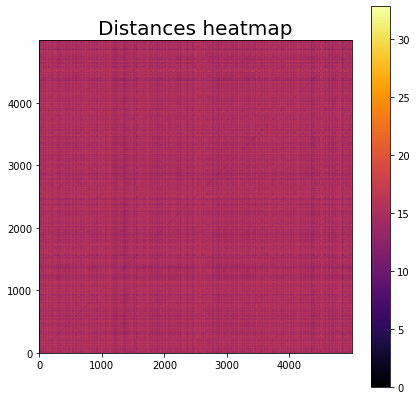

In [11]:
plt.figure(figsize=((7,7)))
plt.title("Distances heatmap", fontsize=20)
img = plt.imshow(data_matrix, origin="lower",cmap="inferno")
plt.colorbar(img, );   

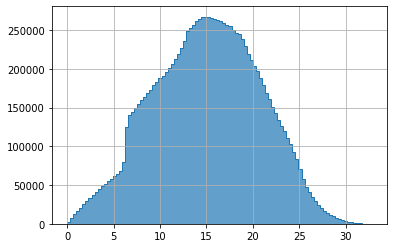

In [12]:
array_d=squareform(data_matrix, checks=True)
plt.hist(array_d,bins=100, alpha=0.7 )
plt.hist(array_d,bins=100, histtype='step',color='tab:blue'  )
plt.grid(True)

## Computing Diffusion Maps

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning:

Casting complex values to real discards the imaginary part



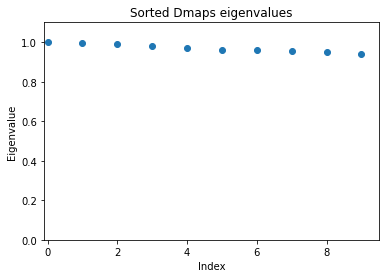

In [13]:
vals1, vecs1 = DMAPS( data_matrix, 2.5)

In [14]:
vals1 = np.real(vals1)
vecs1 = np.real(vecs1)


def psi( vals, vecs, i ):                #This is an auxiliary function which returns the the multiplication of an eigenvalue to the corresponding eigenvector 
    return vals[i] * vecs[:, i]

In [15]:
dict_DMAPs= {'1st_coordinate':  np.real(psi(vals1, vecs1, 1)), '2nd_coordinate': np.real(psi(vals1, vecs1, 2)), '3rd_coordinate': np.real(psi(vals1, vecs1, 3)), 'index': range(len(np.real(psi(vals1, vecs1, 1))))}
df_DMAPs=pd.DataFrame(dict_DMAPs)

In [16]:
# Let's plot the mapped data in 3D 
fig = px.scatter_3d(df_DMAPs, x=df_DMAPs['1st_coordinate'].values, y=df_DMAPs['2nd_coordinate'].values, z=df_DMAPs['3rd_coordinate'].values ,
                    color= df_DMAPs['1st_coordinate'].values, title='DMAP', opacity=0.4 )
fig.update_traces(marker=dict(size=3,
                              line=dict(width=0,
                                        color='DarkSlateGrey'), opacity=0.3),
                  selector=dict(mode='markers'))
fig.update_traces(opacity=0.1, selector=dict(type='scatter'))

Text(0.5, 0, '1st coordinate')

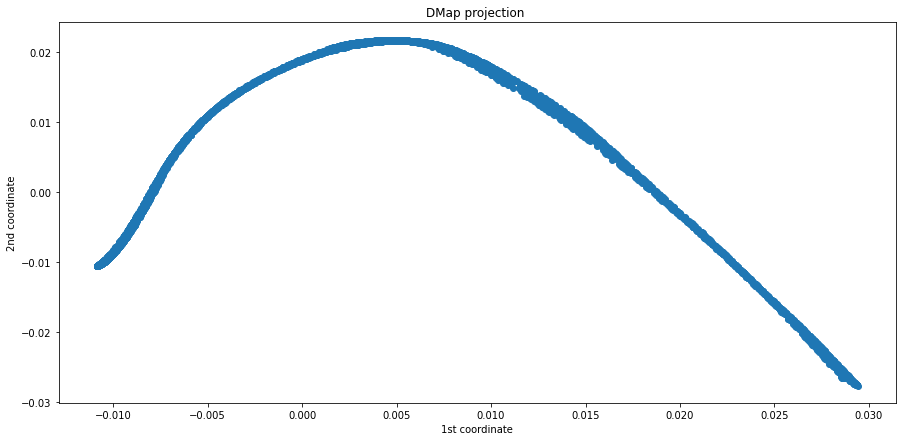

In [17]:
#We can project it on a single or two diffusion coordinates
plt.figure(figsize=((15,7)))
#plt.scatter( np.zeros((len(df_DMAPs['1st_coordinate'].values))), df_DMAPs['1st_coordinate'] )
plt.scatter( df_DMAPs['1st_coordinate'], df_DMAPs['2nd_coordinate'] )
plt.title('DMap projection ')
plt.ylabel('2nd coordinate')
plt.xlabel('1st coordinate')
